In [6]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Apple corporation.

In [7]:
# To predict closing price of a stock with input of past 60 days stock price.

In [8]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [9]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                Open      High       Low     Close        Volume
Date                                                            
2012-01-03   12.4779   12.5577   12.4520   12.5198  3.544907e+08
2012-01-04   12.4849   12.6235   12.4600   12.5866  3.051786e+08
2012-01-05   12.6314   12.7422   12.5627   12.7272  3.178972e+08
2012-01-06   12.7800   12.8717   12.7630   12.8608  3.734286e+08
2012-01-09   12.9525   13.0213   12.8289   12.8408  4.620092e+08
...              ...       ...       ...       ...           ...
2023-09-07  175.1800  178.2100  173.5400  177.5600  1.124888e+08
2023-09-08  178.3500  180.2390  177.7900  178.1800  6.560207e+07
2023-09-11  180.0700  180.3000  177.3400  179.3600  5.895305e+07
2023-09-12  179.4900  180.1300  174.8200  176.3000  9.037019e+07
2023-09-13  176.5100  177.3000  173.9800  174.2100  8.426793e+07

[2943 rows x 5 columns]


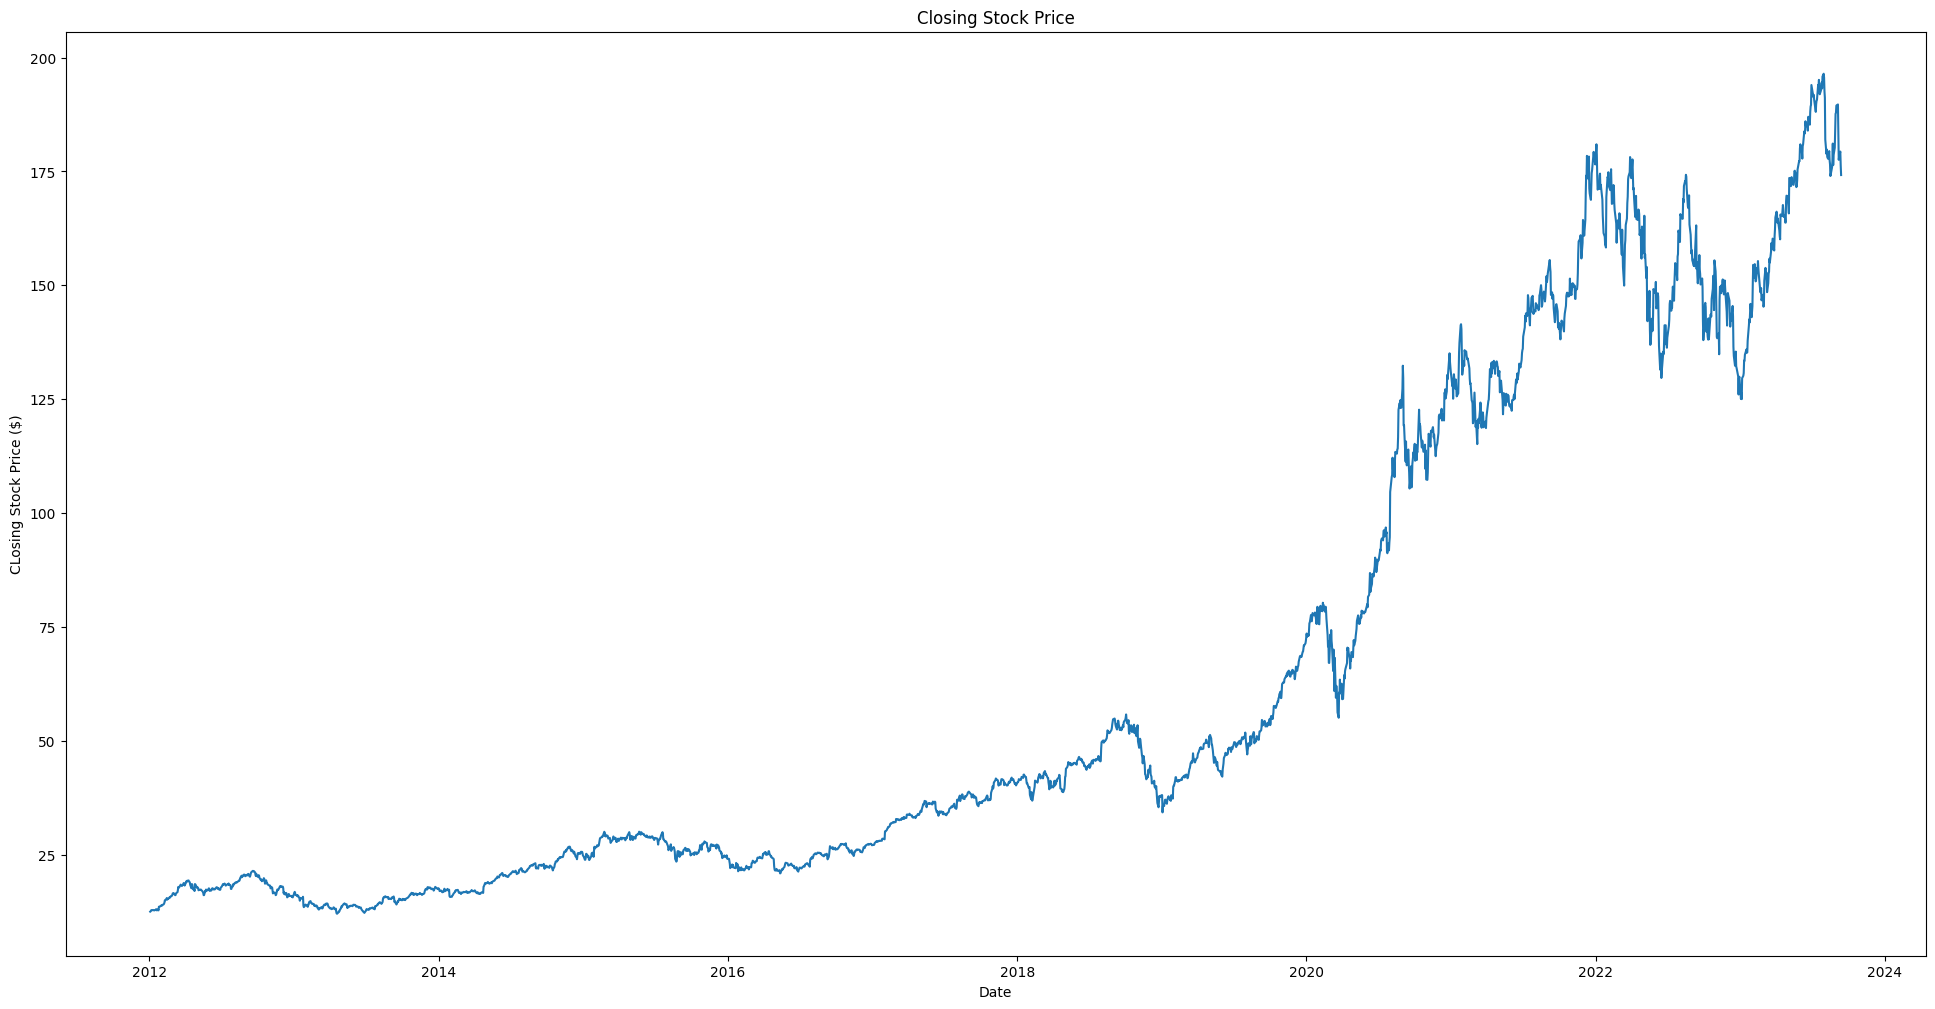

In [10]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [11]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2355


In [12]:
print(dataset)

[[ 12.5198]
 [ 12.5866]
 [ 12.7272]
 ...
 [179.36  ]
 [176.3   ]
 [174.21  ]]


In [13]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.00247091]
 [0.00283319]
 [0.00359572]
 ...
 [0.9073139 ]
 [0.89071827]
 [0.87938334]]


In [14]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [15]:
print(x_train[0])
print(y_train[0])

[0.00247091 0.00283319 0.00359572 0.00432029 0.00421182 0.00446076
 0.00434741 0.00415216 0.0038875  0.00467715 0.00541745 0.00519075
 0.00396885 0.00513651 0.00398512 0.00831572 0.00798597 0.00841876
 0.00935918 0.00994328 0.00989501 0.00971604 0.0104623  0.01117602
 0.01197598 0.0132738  0.01599364 0.01603703 0.01755612 0.01868636
 0.01674532 0.01748562 0.01746935 0.01957309 0.01927589 0.01982691
 0.02083295 0.02138939 0.02296869 0.02413635 0.02447152 0.02459625
 0.02259556 0.02211396 0.02218989 0.024055   0.02459625 0.02570968
 0.02837529 0.03191677 0.03125186 0.03125186 0.03381443 0.03462034
 0.03405306 0.03352265 0.0329879  0.0347825  0.03602664 0.03654511]
0.03526410385181507


In [16]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[ 2320.53753884]
 [ 2332.85451028]
 [ 2358.77915376]
 ...
 [33083.501288  ]
 [32519.28074   ]
 [32133.914418  ]]


In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [20]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 8s 88ms/step - loss: 0.0099
Epoch 2/64
23/23 [==============================] - 2s 88ms/step - loss: 4.7906e-04
Epoch 3/64
23/23 [==============================] - 2s 87ms/step - loss: 1.9283e-04
Epoch 4/64
23/23 [==============================] - 2s 87ms/step - loss: 1.6375e-04
Epoch 5/64
23/23 [==============================] - 2s 86ms/step - loss: 1.5717e-04
Epoch 6/64
23/23 [==============================] - 3s 140ms/step - loss: 1.6600e-04
Epoch 7/64
23/23 [==============================] - 2s 89ms/step - loss: 1.5617e-04
Epoch 8/64
23/23 [==============================] - 2s 86ms/step - loss: 1.5343e-04
Epoch 9/64
23/23 [==============================] - 2s 89ms/step - loss: 1.4861e-04
Epoch 10/64
23/23 [==============================] - 2s 88ms/step - loss: 1.5559e-04
Epoch 11/64
23/23 [==============================] - 2s 91ms/step - loss: 1.5249e-04
Epoch 12/64
23/23 [==============================] - 3s 132ms/step - loss: 1.

In [21]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [22]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 1s 16ms/step
Error % =  4.036690140785064
Accuracy % =  95.96330985921493


<ipython-input-24-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


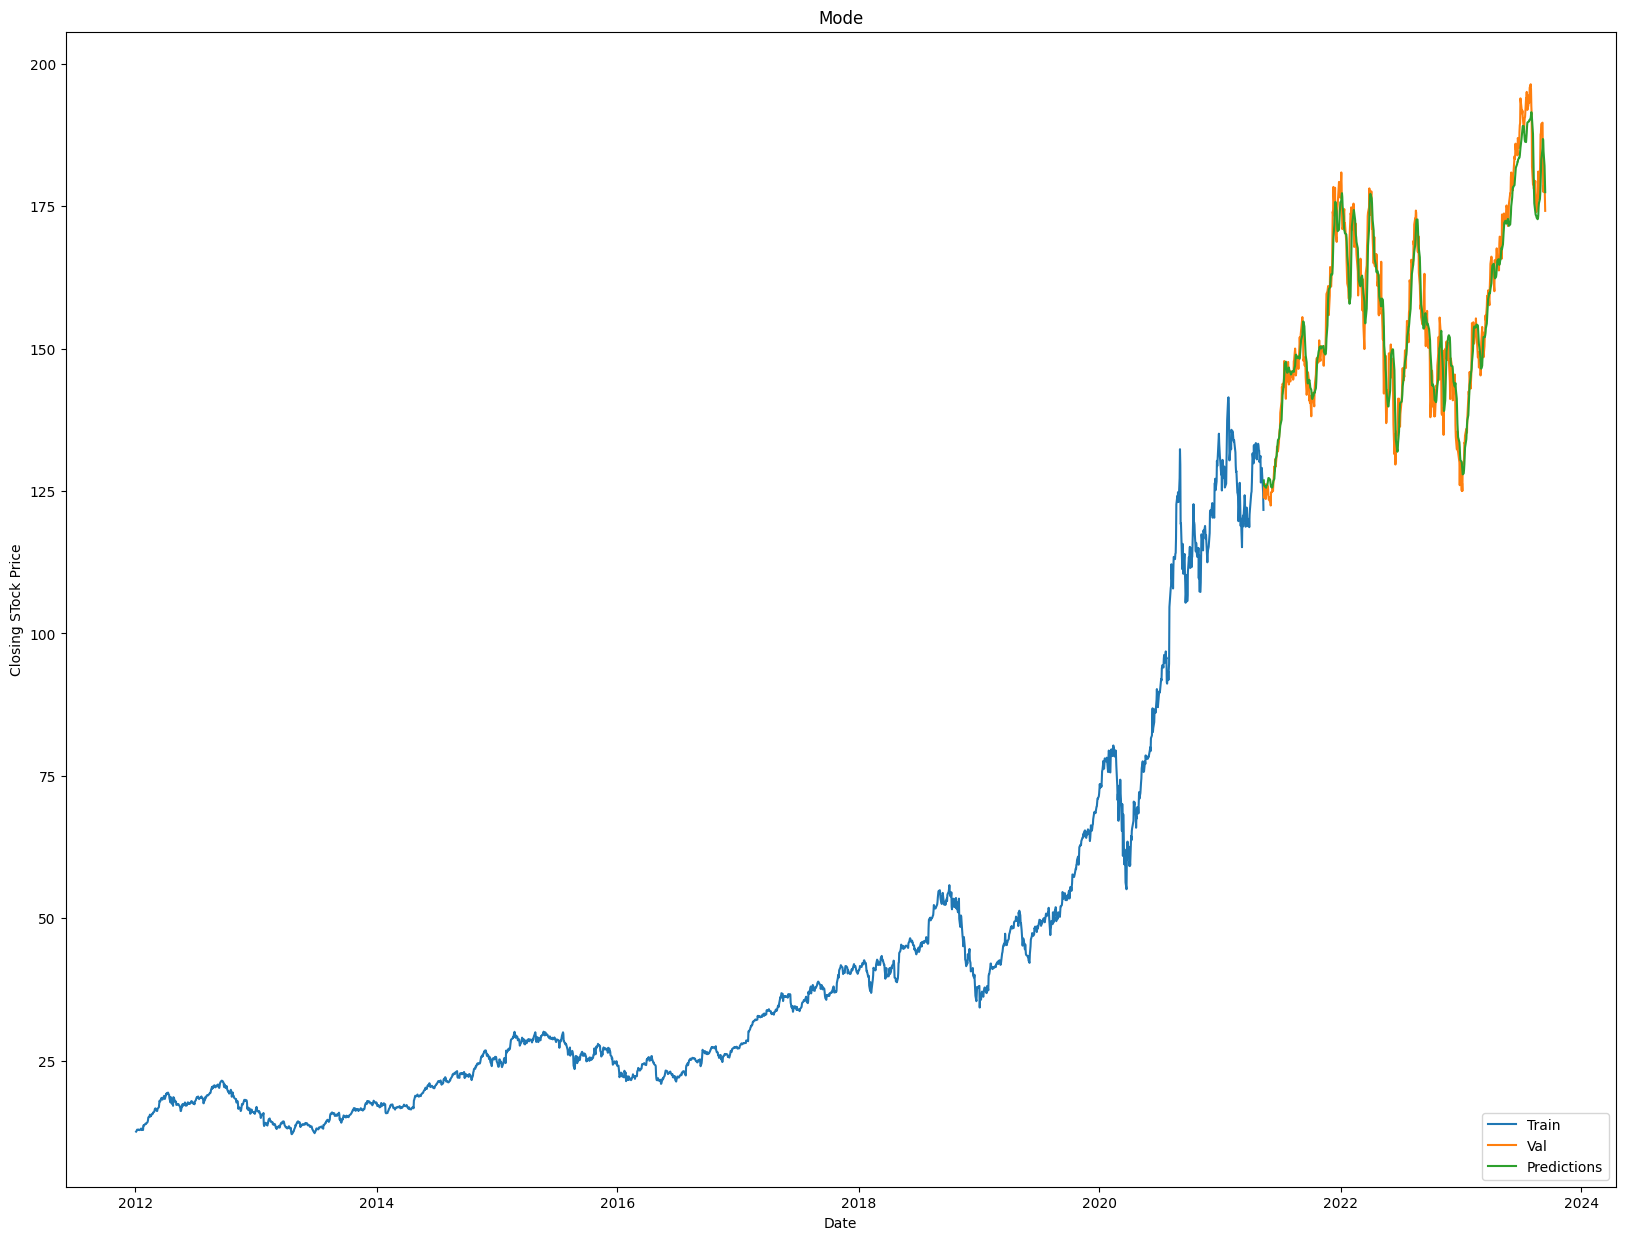

In [24]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [25]:
# Use Model to Predict Future Price
Google_quote = web.DataReader('GOOGL', data_source = 'stooq', start = startDate, end = endDate)
new_df = Google_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 38ms/step
[[123.423386]]
